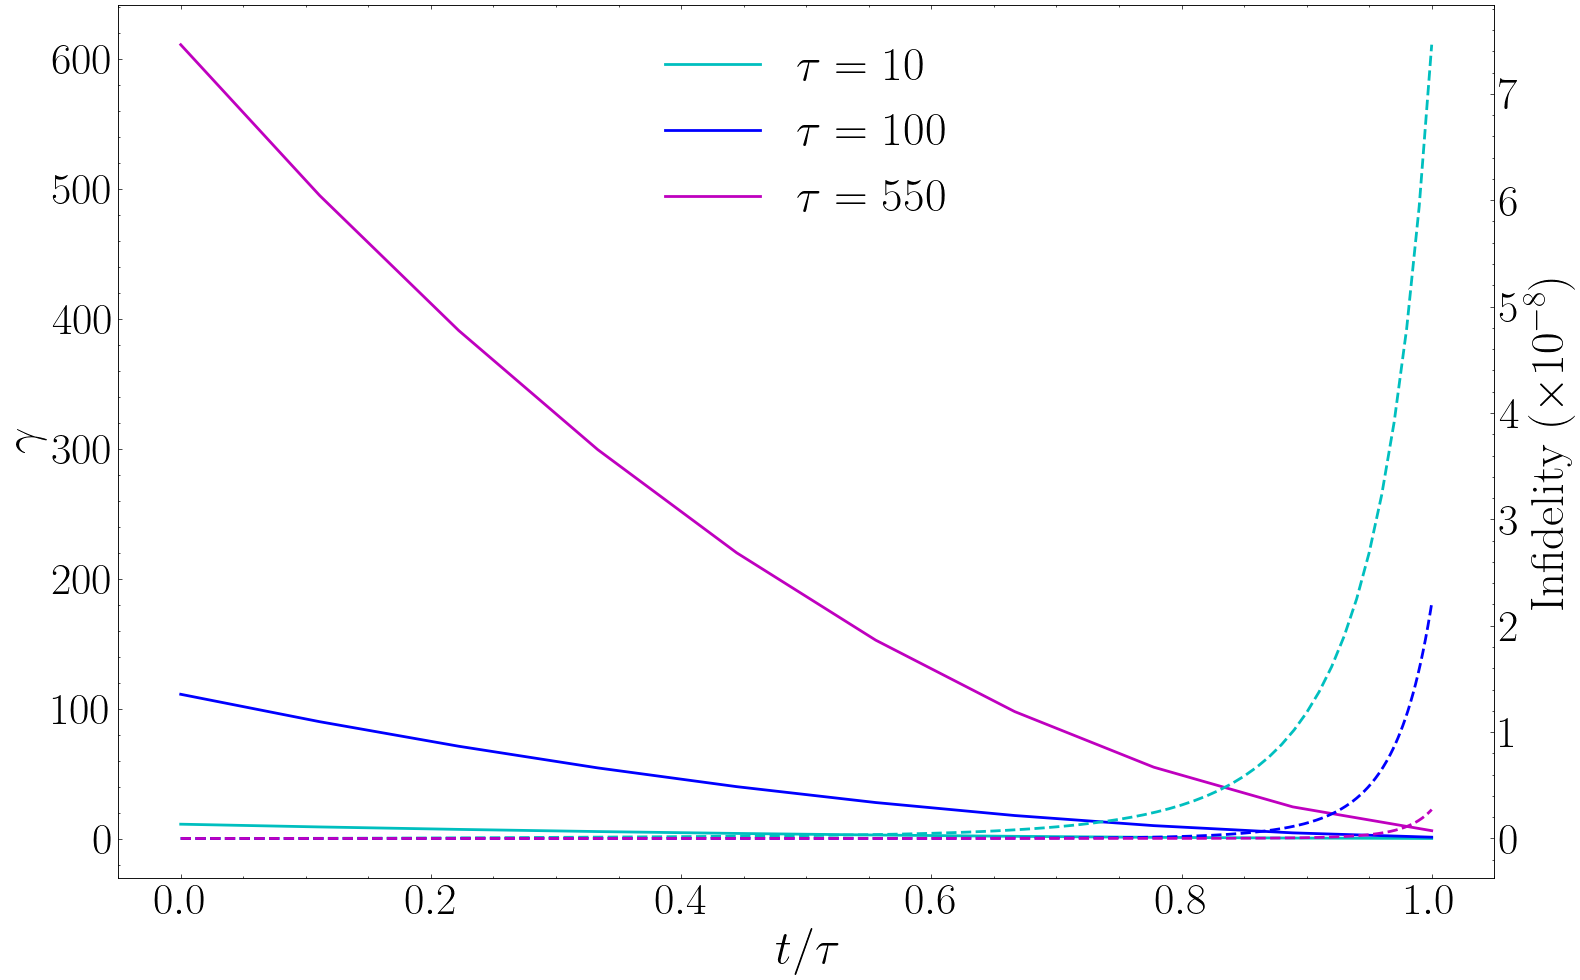

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import qutip as qt

plt.style.use(['science'])  
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 34,    
    "axes.titlesize": 32,    
    "xtick.labelsize": 32,   
    "ytick.labelsize": 32,   
    "legend.fontsize": 34,   
})

g0 = 1.0 
g1 = 0.1  
dt = 0.1 
gamma = 15
delta = 1e-5
N = 20
a = -1/(np.log(g1/g0))

def g_func(t, T):
    return g0 + (g1 - g0) * (t / T)
    #return g0 * np.exp(-t / (a*T))
    #return 1/(1/g0 + t/gamma)

def construct_hamiltonian(j, theta, t, T):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t, T) * (Jz**2) - J2 + theta * Jx
    return H

T_values = [10, 100, 550]
colors = ['c', 'b', 'm']

def instantaneous_ground_state(j, theta, t, t_final):
    H_t = construct_hamiltonian(j, theta, t, t_final)
    eigvals, eigvecs = H_t.eigenstates()
    return eigvecs[0]

def fidelity_vs_instantaneous_ground(j, theta, t_target, t_final):
    times = np.arange(0, t_target + dt, dt)
    psi0 = instantaneous_ground_state(j, theta, 0, t_final)
    def H_time(t, args):
        return construct_hamiltonian(j, theta, t, t_final)
    result = qt.mesolve(H_time, psi0, times, [], args={})
    evolved_states = result.states
    fidelities = []
    for psi_t, t in zip(evolved_states, times):
        psi_gs = instantaneous_ground_state(j, theta, t, t_final)
        fid = np.abs(psi_gs.overlap(psi_t))**2
        fidelities.append(1-fid)
    return times, fidelities

fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()
# Plot gamma curves
for i, tau in enumerate(T_values):
    t = np.linspace(0, tau, 10)
    y = tau/np.abs(g1-g0) * (g0 + (g1-g0)*t/tau)**2
    #y = np.abs(a)*tau*g0*np.exp(-t/(a*tau))
    ax1.plot(t/tau, y, linewidth=2, label=f'$\\tau = {tau}$', color=colors[i])
    times, fidelities = fidelity_vs_instantaneous_ground(j=0.5*N, theta=delta*0.5, t_target=tau, t_final = tau)
    ax2.plot(times/tau, fidelities, linestyle='--', linewidth=2, color=colors[i]) #, label=f'Fidelity for $\\tau = {tau}$'
ax1.set_xlabel(r'$t/\tau$')
ax1.set_ylabel(r'$\gamma$')

# --- NEW: keep scientific style but hide the automatic offset text -----------
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax2.yaxis.offsetText.set_visible(False)                # no “×10⁻⁸” above axis
ax2.set_ylabel(r'Infidelity ($\times 10^{-8}$)')       # put the factor here

# combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')

fig.tight_layout()
fig.savefig('fidelitylinearcoefficient.pdf')            # if you need a file
plt.show()

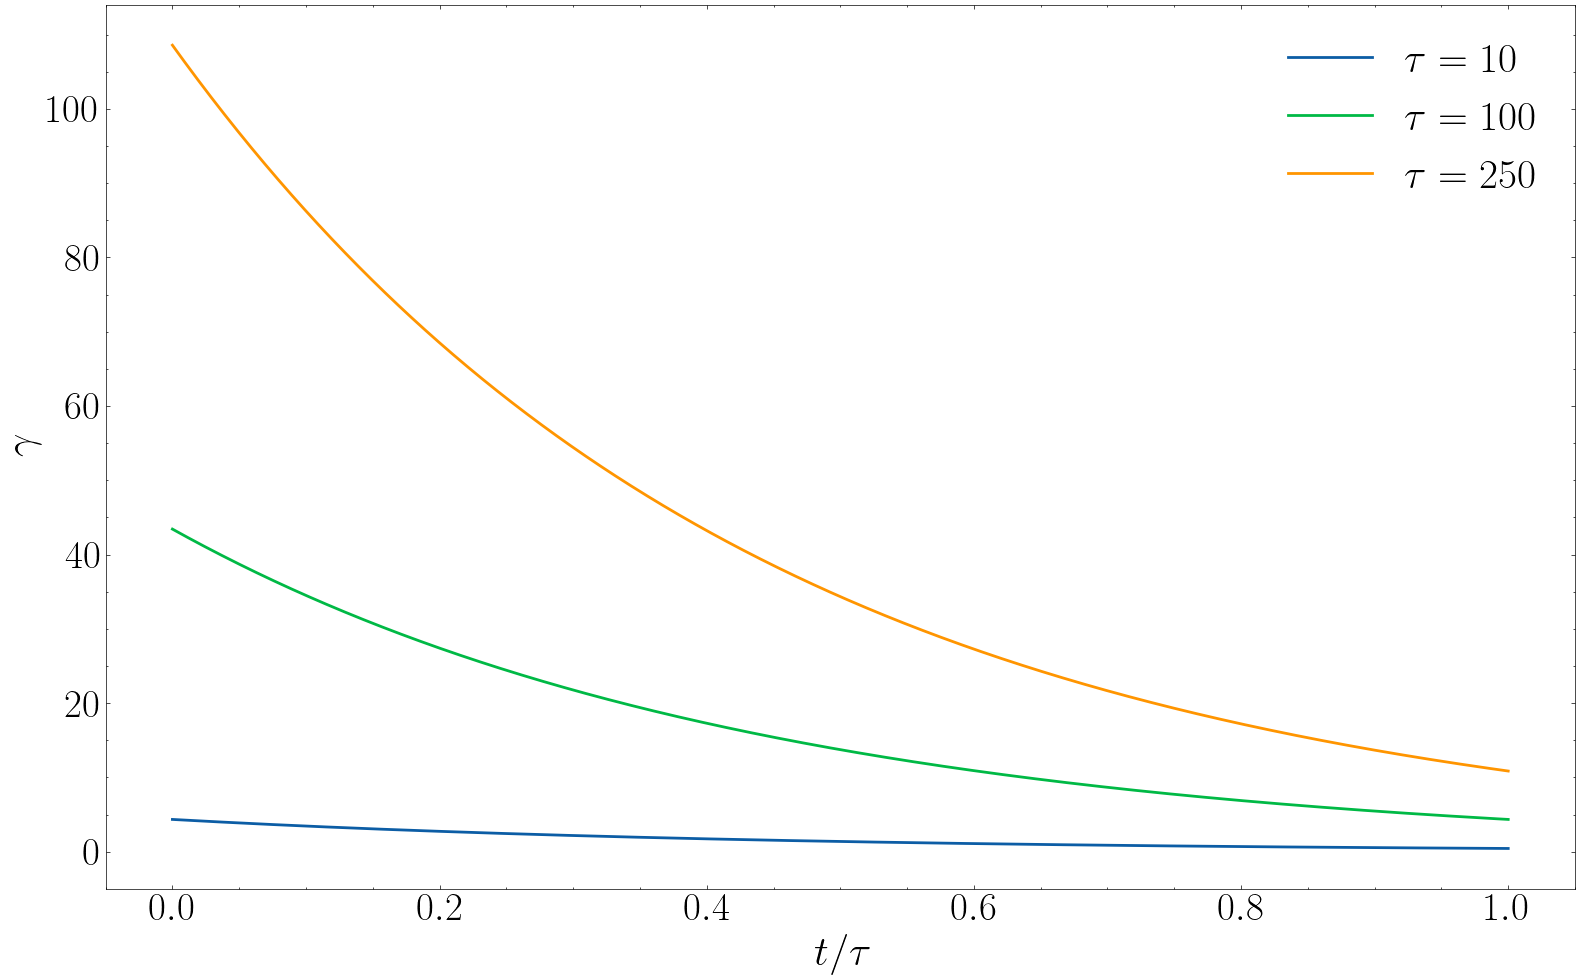

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science'])  
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 30,    # x- and y-label size
    "axes.titlesize": 28,    # title size
    "xtick.labelsize": 28,   # x-tick label size
    "ytick.labelsize": 28,   # y-tick label size
    "legend.fontsize": 30,   # legend text size
})

# Parameters
g0 = 1.0  # initial value
g1 = 0.1  # final value
a = -1/(np.log(g1/g0))

T_values = [10,100,250]

plt.figure(figsize=(16, 10))
for tau in T_values:
    # Create time points
    t = np.linspace(0, tau, 1000)  # plot from 0 to tau

    # Calculate the function
    y = np.abs(a)*tau*g0*np.exp(-t/(a*tau))

    # Create the plot
    plt.plot(t/tau, y, label=f'$\\tau = {tau}$', linewidth=2)

plt.xlabel(r'$t/\tau$')  # Increased axis label font size
plt.ylabel(r'$\gamma$')  # Increased axis label font size
plt.legend(loc='best')  # Increased legend font size
# Show the plot
plt.savefig('expcoefficient.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()